### Student ID : 18195121
### Name: Vipul Popat


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.utils import shuffle
import math
from sklearn.datasets.samples_generator import make_blobs
from sklearn.model_selection import train_test_split
import pandas as pd

import seaborn as sns

# Task 1

In [2]:
df = pd.read_csv("bank_et1.csv",index_col=['Unnamed: 0'])


In [3]:
df.head(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,32,technician,single,tertiary,no,392,1.300134,0.473895,yes,no,cellular,1,apr,957,2,131,2,failure,no
1,39,technician,divorced,secondary,no,688,-0.193701,0.237021,yes,yes,cellular,1,apr,233,2,133,1,failure,no
2,59,retired,married,secondary,no,1035,1.334266,0.121981,yes,yes,cellular,1,apr,126,2,239,1,failure,no
3,47,blue-collar,married,secondary,no,398,0.362286,1.251328,yes,yes,cellular,1,apr,274,1,238,2,failure,no
4,54,retired,married,secondary,no,1004,0.072075,-0.533738,yes,no,cellular,1,apr,479,1,307,1,failure,no


Suggestion: try PLA on this dataset before using the bank dataset

In [4]:
df.tail(5)

,age,job,marital,education,default,balance,ratio_bal_ln,ratio_ln_inc,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
1995,20,student,single,NaN,no,2785,-2.170524,1.081071,no,no,cellular,16,sep,327,2,-1,0,NaN,yes
1996,28,admin.,single,secondary,no,127,0.811788,1.134496,no,no,cellular,16,sep,1334,2,-1,0,NaN,yes
1997,81,retired,married,primary,no,1154,0.504655,0.042190,no,no,telephone,17,sep,231,1,-1,0,NaN,yes
1998,46,services,married,primary,no,4343,-0.965874,0.302708,yes,no,NaN,20,sep,185,1,-1,0,NaN,yes
1999,40,entrepreneur,married,secondary,no,6403,-0.800893,1.066659,no,no,cellular,22,sep,208,2,-1,0,NaN,yes


In [5]:
df.describe()

,age,balance,ratio_bal_ln,ratio_ln_inc,day,duration,campaign,pdays,previous
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,41.751500,1413.663500,0.241951,0.485030,13.851500,292.020500,1.909500,167.896000,2.561500
std,12.723077,3131.224213,0.821604,1.075543,9.712189,221.557295,1.378862,131.754126,3.400735
min,18.000000,-980.000000,-2.632068,-2.851405,1.000000,7.000000,1.000000,-1.000000,0.000000
25%,32.000000,201.500000,-0.308018,-0.274181,5.000000,146.000000,1.000000,75.750000,1.000000
50%,38.000000,551.000000,0.224099,0.487082,12.000000,236.000000,1.000000,182.000000,2.000000
75%,50.000000,1644.500000,0.806315,1.211896,23.000000,379.000000,2.000000,251.000000,3.000000
max,93.000000,81204.000000,2.961979,4.046914,31.000000,1823.000000,11.000000,854.000000,55.000000


In [6]:
nunique = df.nunique()
nunique


age               68
job               11
marital            3
education          3
default            2
balance         1274
ratio_bal_ln    2000
ratio_ln_inc    2000
housing            2
loan               2
contact            2
day               31
month             12
duration         655
campaign          11
pdays            363
previous          26
poutcome           3
subscribed         2
dtype: int64

### The attribute that can be the target/dependable varibale for 2-class classifictation is "subscribed" which means whether the customer is subscribed for term deposit. This would allow bank to market the product to new customers based for term deposit products

# Task 2

In [7]:
df.isnull().sum() #Check for null values in field

age               0
job              10
marital           0
education       104
default           0
balance           0
ratio_bal_ln      0
ratio_ln_inc      0
housing           0
loan              0
contact         191
day               0
month             0
duration          0
campaign          0
pdays             0
previous          0
poutcome        454
subscribed        0
dtype: int64

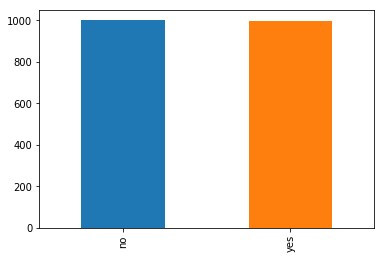

In [45]:
df['subscribed'].value_counts().plot.bar()

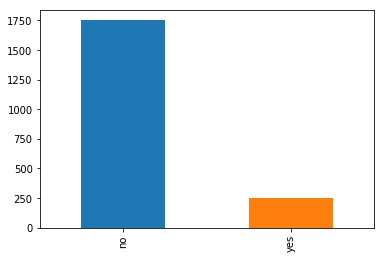

In [44]:
df['loan'].value_counts().plot.bar()

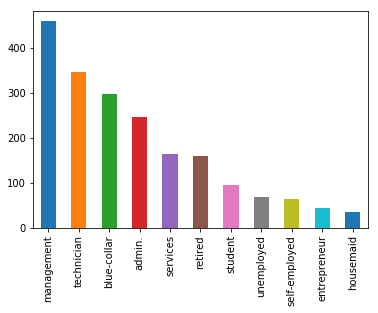

In [46]:
df['job'].value_counts().plot.bar()

## Use at least two different plotting techniques to plot the distribution of two numerical and two categorical attributes

### Numerical Attributes

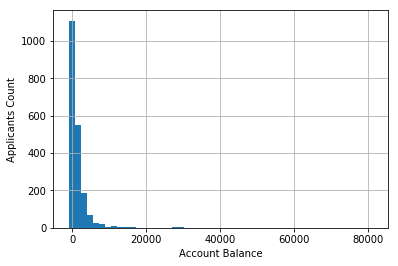

In [11]:
df['balance'].hist(bins=50)
plt.xlabel('Account Balance')
plt.ylabel('Applicants Count')
plt.show()

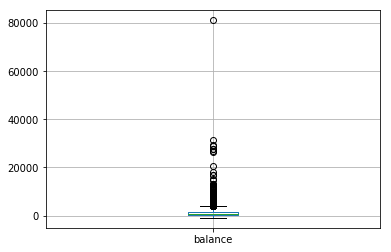

In [12]:
df.boxplot(column='balance')

### The box plot shows that we should be considering the data for balance under 40000 for EDA as there is only one data point > 40000 and that can be considered as an outlier.

In [13]:
df = df.loc[df['balance'] <= 40000]

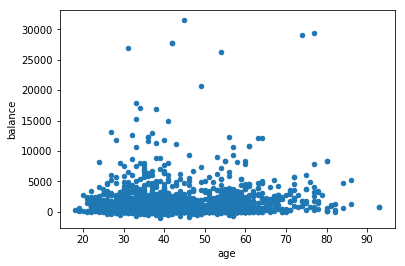

In [14]:
df.plot.scatter(x='age', y='balance')

### Based on this scatter plot we can say that we cannot get a logical or linear separation using these two attributes and it would not allow us to separate the yes and no subscribed as the distribution is overlapping

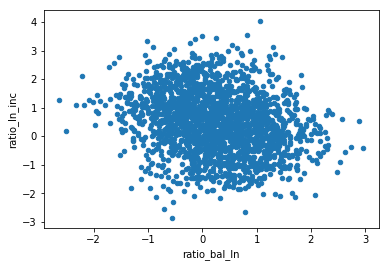

In [48]:
df.plot.scatter(x='ratio_bal_ln', y='ratio_ln_inc')

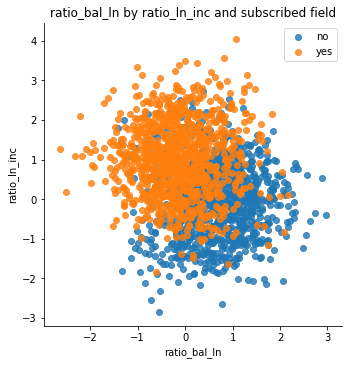

In [16]:
# Ratio_bal_ln by Ratio_ln_inc and Subscribed field
sns.lmplot( x="ratio_bal_ln", y="ratio_ln_inc", data=df, fit_reg=False, hue='subscribed', legend=False)
 
# Legend and title
ax = plt.gca()
ax.set_title("ratio_bal_ln by ratio_ln_inc and subscribed field")
plt.legend(loc='upper right')

### Based on this scatter plot and lmplot, we can say that we could get a linear separation using these two attributes. There is an overlap between the two clusters and hence learning would be difficult. These two also could be said to be the most important features based upon the learning and decision making process for identifying if the user has subscribed to a term deposit or not.

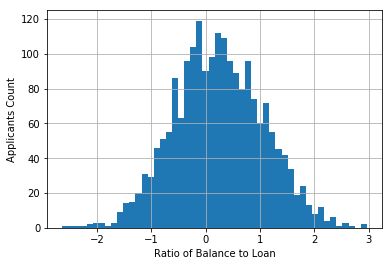

In [17]:
df['ratio_bal_ln'].hist(bins=50)
plt.xlabel('Ratio of Balance to Loan')
plt.ylabel('Applicants Count')
plt.show()

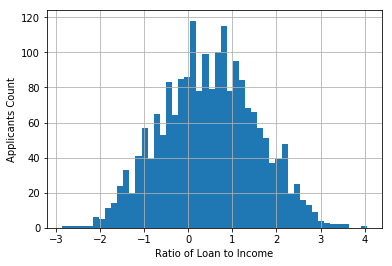

In [18]:
df['ratio_ln_inc'].hist(bins=50)
plt.xlabel('Ratio of Loan to Income')
plt.ylabel('Applicants Count')
plt.show()

### Categorical Attributes

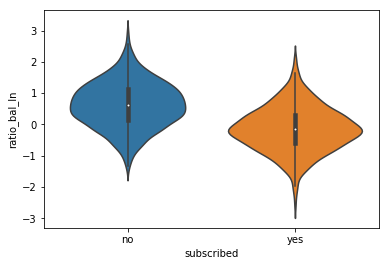

In [19]:
sns.violinplot(x='subscribed', y='ratio_bal_ln',data=df)
plt.show()

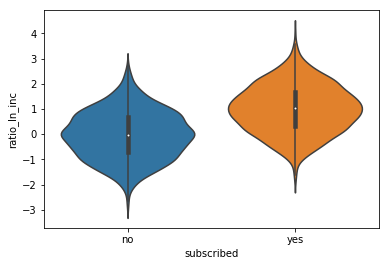

In [20]:
sns.violinplot(x='subscribed', y='ratio_ln_inc',data=df)
plt.show()

As noted above `loan` is rather a categorical attribute with two categories/values:

- no - the applicant dosent have a personal loan
- yes - the applicant has a personal loan

Let's look at if the applicant is subscribed to term deposit based if the applicant is on `loan`. 

First, let's take a look at the frequency table for attribute `loan`:

In [21]:
frequency_table = df['loan'].value_counts(ascending=True)
print('Frequency Table for Personal Loan:') 
print(frequency_table)

Frequency Table for Personal Loan:
yes     250
no     1749
Name: loan, dtype: int64


Now we build an Excel-style pivot table for `subscribed` and `loan` with the pivot_table method:

In [22]:
pivot_table = df.pivot_table(values='subscribed',
                       index=['loan'],
                       aggfunc=lambda x: x.map({'yes':1, 'no':0}).mean()) 

In [23]:
print(pivot_table)

      subscribed
loan            
no      0.546598
yes     0.172000


Hence the probabilty of applicant with no personal loan subscribing to term deposit is 54% compared to application with a personal loan which is just 17%

Let's plot `loan` and the probability of subscribing to term deposit based on `loan`

Text(0.5, 1.0, 'Applicants by Personal Loan')

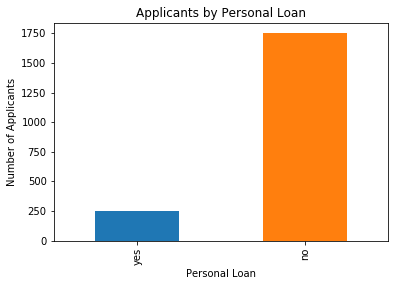

In [24]:
# Plot the frequency table for Credit_History
frequency_table.plot(kind='bar')
plt.xlabel('Personal Loan')
plt.ylabel('Number of Applicants')
plt.title('Applicants by Personal Loan')

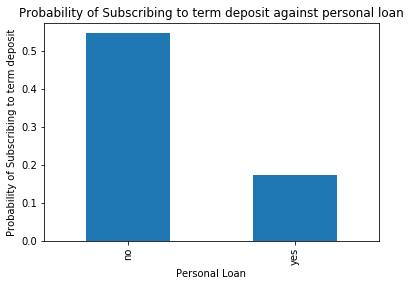

In [25]:
# Plot pivot table
pivot_table.plot(kind='bar')
plt.xlabel('Personal Loan')
plt.ylabel('Probability of Subscribing to term deposit')
plt.title('Probability of Subscribing to term deposit against personal loan')
plt.legend().set_visible(False) # we don't need the default legend

# Task 3

The dataset provided in the task consists of 2000 samples which correspond to historical records regarding a marketing campaign.
We are trying to extract a two dimensional **input space** that can be utilized to predict the **output space** which refers to whether the customer has already subscribed to a term deposit product or not.
The two inputs selected on the decision making process above are
- balance / loan ratio
- loan / income ratio
These two attributes will be used to learn and identify a **unknown target function** which links to the above mentioned input and output spaces. Our objective is to use the perceptron algorithm to determine the **hypothesis set**. Out of the probable candidates of the hypothesis set, we would need to determine the best suited one for the problem which would be the **final hypothesis**.
On Execution of PLA on the dataset, there is a need to compare **in-sample error** and the **out-sample** error against the Hoeffding bound and determine if learning is indeed possible.


# Task 4

In [26]:
# introudced the random state so that we always get the same results and consistent dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=42)
y = [yy if yy == 1 else -1 for yy in y]


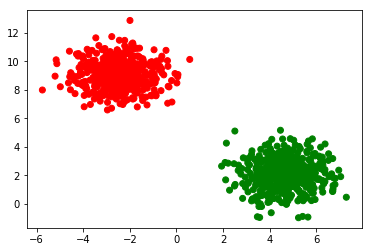

In [27]:
colors = ['green' if yy == 1 else 'red' for yy in y] 
plt.scatter(X[:,0],X[:,1], color=colors)
plt.show()

In [28]:
def h(x,w):
    #Perceptron model: the sign of the dot product of weights and input vector determines the class allocation
    bias = np.array([1])
    return np.sign(w.T.dot(np.concatenate((bias,x))))

In [29]:
def point_on_boundary(weights, x):
    # Return the y-position on the boundary based on given x-position
    return -(weights[0]+weights[1]*x)/weights[2]

In [30]:
def decision_boundary(weights, x_min, x_max):
    # Return two points on the decision boundary
    # changed the below function based on pep's and others recommendations as it was a bug
    return [point_on_boundary(weights, x_min), point_on_boundary(weights, x_max)]

In [31]:
def pla(training_in, training_out, weights, max_iterations=1000):
    bias = np.array([1])
    iterations=0
    while True:
        errors = 0;
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                iterations+=1;
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;
        if (errors == 0):
            print("Hypothesis(g) found after ",iterations, " iterations")
            break
            
        if (iterations >= max_iterations):
            print("Stopping at iteration {} as the error is not converging".format(iterations))
            break
            
    return weights, iterations

In [32]:
def calc_error(training_in, training_out, weights):
    # Calculate the classification error as the fraction of training samples that are misclassified
    errors=0
    for x,y in zip(training_in, training_out):
        if (h(x,weights)!=y):
            errors+=1;
    return errors/len(training_in)

In [33]:
def exec_pla(X,y):
    w = np.array([0,0,0])
    # setting the first weight which is the bias to 1
    w[0] = 1
    
    w,n_iterations = pla(X,y,w)
    xs = [X[:,0].min(),X[:,0].max()]
    ys = decision_boundary(w,xs[0],xs[1])
    # plotting the decision boundary
    colors = ['green' if yy == 1 else 'red' for yy in y] 
    plt.scatter(X[:,0],X[:,1], color=colors)
    plt.plot(xs,ys, 'b-')
    plt.title("Iteration: {:.0f} : Bias = {}, weight1 = {:.2f}, weight2 = {:.2f}".format(n_iterations,w[0],w[1],w[2]))
    plt.show()

In [34]:
def pla_pocket(training_in, training_out, weights, max_iterations):
    bias = np.array([1])
    iterations=0
    # setting the pocket weights to the initial weights and error
    poc_err = calc_error(training_in, training_out, weights)
    poc_w = weights
    poc_iter = iterations
    while iterations < max_iterations:
        errors = 0
        iterations+=1
        print("Iteration:{}/{}".format(iterations, max_iterations))        
        
        for x,y in zip(training_in, training_out):
            if (h(x,weights)!=y):
                # if the new error calculated is bette than the previous error
                # the the new weights and error would be pocketed 
                err = calc_error(training_in, training_out, weights)
                if (err < poc_err):
                    poc_err = err
                    poc_w = weights
                    poc_iter = iterations
                    print("Pocketing weights:{} error:{} found at iterations:{}".format(poc_w, poc_err, poc_iter))
                    
                weights = weights + y*(np.concatenate((bias,x)))
                errors+=1;

        if (errors == 0):
            print("Hypothesis found. Nb iterations:", iterations)
            break
            
    return poc_w, poc_iter, poc_err

Hypothesis(g) found after  3  iterations


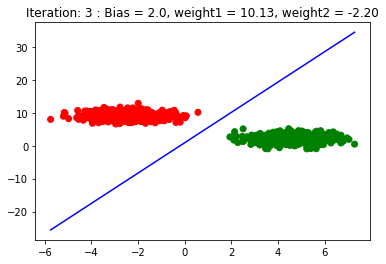

In [35]:
exec_pla(X,y)

In [36]:
# Start by converting "subscribed" target from "yes/no" to "1/-1"
df['subscribed_code'] = df['subscribed'].map({'yes': 1, 'no': -1})
df[["subscribed", "subscribed_code"]].head(5)

,subscribed,subscribed_code
0,no,-1
1,no,-1
2,no,-1
3,no,-1
4,no,-1


### Applying the PLA to banking data

Stopping at iteration 1004 as the error is not converging


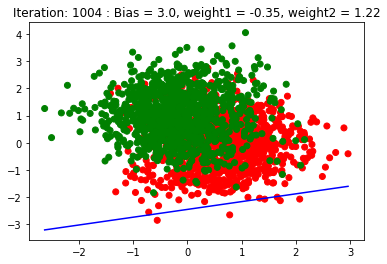

In [37]:
# Initiatialing the weights with random values
weights = np.array([0,0,0])

# Use 'ratio_bal_ln' and 'ratio_ln_inc' as our inputs
X = df[['ratio_bal_ln', 'ratio_ln_inc']].values

# Use 'subscribed_code' as the target
y = df['subscribed_code'].values

exec_pla(X,y)

### The line is not correctly dividing the samples, it is due the fact that the samples of classification i.e. subscribed = Y might be grouped at top or bottom and hence not a correct distribution. If we shuffle the samples across, may be the classification would be correct and the decision boundry would be the desired one

Stopping at iteration 1196 as the error is not converging


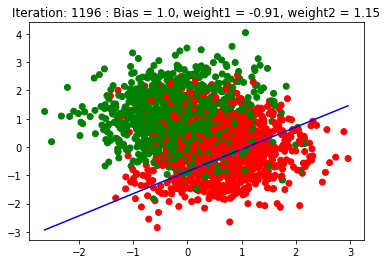

In [38]:


# Shuffle the data
X_shuffled, y_shuffled = shuffle(X, y, random_state=42)

exec_pla(X_shuffled,y_shuffled)

### The decision boundry is far better than the earlier one. It wont be able to divide it fully as we knew in the first place that there was an overlap in the distribution

In [39]:
# Number of iterations before exiting the PLA.
max_iterations = 20

poc_w, poc_iter, poc_err = pla_pocket(X_shuffled, y_shuffled, weights, max_iterations)

print("="*50)
print("Pocketed weights                   :", poc_w)
print("Pocketed Weights at iteration      :", poc_iter)
print("Pocketed error                     :", poc_err)

Iteration:1/20
Pocketing weights:[-1.         -1.91867058 -0.96601225] error:0.4762381190595298 found at iterations:1
Pocketing weights:[ 0.         -2.11336396  0.66681931] error:0.24112056028014006 found at iterations:1
Pocketing weights:[ 1.         -3.5226984   1.48847223] error:0.23711855927963982 found at iterations:1
Pocketing weights:[ 0.         -2.55138938  2.41887291] error:0.22111055527763882 found at iterations:1
Pocketing weights:[ 0.         -2.31624802  1.82709164] error:0.22011005502751377 found at iterations:1
Pocketing weights:[ 0.         -1.53575078  1.38253002] error:0.21860930465232617 found at iterations:1
Pocketing weights:[ 0.         -1.91207784  1.63001008] error:0.2176088044022011 found at iterations:1
Pocketing weights:[ 0.         -1.97475434  1.73509667] error:0.21710855427713857 found at iterations:1
Iteration:2/20
Pocketing weights:[ 0.         -2.57415777  2.30122085] error:0.21660830415207605 found at iterations:2
Iteration:3/20
Iteration:4/20
Iterat